### 데이터 타입이 오브젝트일떄 확인

In [4]:
import pandas as pd

def type_counting_test():
    # 섞여있는 더러운 데이터
    dirty_data = [10, '20', 3.14, 'Error', 100] 
    s = pd.Series(dirty_data)

    print("--- 1단계: apply(type)의 결과 ---")
    type_series = s.apply(type)
    print(type_series)
    # 출력: 
    # 0    <class 'int'>
    # 1    <class 'str'>
    # ... 처럼 '클래스 객체'들이 들어있는 Series가 됨.

    print("\n--- 2단계: value_counts() 결과 ---")
    print(s.apply(type).value_counts())
    # 출력:
    # <class 'int'>      2
    # <class 'str'>      2
    # <class 'float'>    1
    # dtype: int64

if __name__ == "__main__":
    type_counting_test()

--- 1단계: apply(type)의 결과 ---
0      <class 'int'>
1      <class 'str'>
2    <class 'float'>
3      <class 'str'>
4      <class 'int'>
dtype: object

--- 2단계: value_counts() 결과 ---
<class 'int'>      2
<class 'str'>      2
<class 'float'>    1
Name: count, dtype: int64


## 1. loc / iloc 공부

- loc는 언제: 키/날짜 라벨, 조건 필터링 후 특정 컬럼, 협업 안정성
- iloc는 언제: N번째, 샘플링, 행/열 위치 기반 슬라이싱, 모델 입력 배열 만들기 직전

####  밑 처럼 하면 비효율적이라 loc로 그냥 바로
- [Bad] df[df['A'] > 0]['B'] = 10
- [Good] df.loc[df['A'] > 0, 'B'] = 10

동작: loc가 한 번에 원본의 주소(View)를 찾아가서 값을 꽂아버립니다. (Atomic Operation)

In [22]:
import pandas as pd

# 예시 데이터
df = pd.DataFrame(
    {
        "name": ["A", "B", "C"],
        "score": [10, 20, 30],
        "city": ["Seoul", "Busan", "Seoul"]
    },
    index=["u1", "u2", "u3"]  # 라벨 인덱스
)

# loc: 라벨 기반 (행 라벨 'u2', 열 라벨 'score')
# print(f'loc로 조회하는방법 {df.loc(["name","A"])}') --> 안됌. 일단 iloc, loc는 인덱서라서 []로받는다. 따라서 위치의 값이 나오기 위해서 loc["x행이름","y행이름"]이다.
print(df.loc["u2", "score"])
print(df.iloc[1,1]) 

print("\n단일행, 열 출력")
print(df.loc["u1"])
print(df.iloc[0])
print(df.iloc[0,:])

print("\n행 여러행 출력")
# print(df.iloc[[1,:],[1,:]]) --> iloc[1:,1:]이런식으로 했어야하는거임. 
print(df.iloc[1:,1:])
print(df.loc[["u1", "u3"], ["name", "score"]]) # 이거는 각각 단일나오는거라 되는거고 범위의 개념이 아니라.



20
20

단일행, 열 출력
name         A
score       10
city     Seoul
Name: u1, dtype: object
name         A
score       10
city     Seoul
Name: u1, dtype: object
name         A
score       10
city     Seoul
Name: u1, dtype: object

행 여러행 출력
    score   city
u2     20  Busan
u3     30  Seoul
   name  score
u1    A     10
u3    C     30


## 2. 결측치 처리
- isna() = 빈칸 체크펜으로 표시
- fillna() = 빈칸에 임시 답을 적기
- dropna() = 빈칸 있는 문제는 채점에서 제외(버리기)
- interpolate(method = ) 상황에 따라 보간법 사용 한다. : method='ffill' (Forward Fill): "직전 데이터 복사" / method='linear' 선형보간 .. ETC
- -> 결측치가 존재하면 왜곡, 에러발생 따라서 결측이 의미있는지 확인하고 처리하는것

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "name": ["A", None, "C"],
    "score": [10, np.nan, 30],
    "city": ["Seoul", None, "Busan"]
})

#isna() 불량 확인 결과 --> 불대수로 나옴 
print(df.isna())
print(f"\n결측개수: \n{df.isna().sum()}")
print(f"\n 결측비율 :\n{df.isna().sum()/len(df)}")
print(f"\n 결측비율 :\n{df.isna().mean()}") # 열별 결측 비율을 알려줌 ㄷㄷ 생각해보면 sum도 동일한 원리니까 mean도 되는게 맞다.
print(f"\n특정 컬럼의 컬측행만보기:\n {df['name'].isna()}")

'''df.isna()는 True/False 표를 만든다. 
Pandas에서 True/False는 계산할 때 보통 True=1, False=0처럼 취급된다.
그래서: df.isna().sum() = 각 열의 True 개수 = 결측 개수
df.isna().mean() = 각 열의 (True의 평균) = True 비율 = 결측 비율'''

    name  score   city
0  False  False  False
1   True   True   True
2  False  False  False

결측개수: 
name     1
score    1
city     1
dtype: int64

 결측비율 :
name     0.333333
score    0.333333
city     0.333333
dtype: float64

 결측비율 :
name     0.333333
score    0.333333
city     0.333333
dtype: float64

특정 컬럼의 컬측행만보기:
 0    False
1     True
2    False
Name: name, dtype: bool


In [38]:
# fillna() 결측치 채우기 
df_filled = df.copy()
df_filled["score"] = df_filled["score"].fillna(0)
df_filled["name"] = df_filled["name"].fillna("UNKNOWN")
df_filled["city"] = df_filled["city"].fillna("UNKNOWN")
print(f"{df}\n")
print(df_filled)

   name  score   city
0     A   10.0  Seoul
1  None    NaN   None
2     C   30.0  Busan

      name  score     city
0        A   10.0    Seoul
1  UNKNOWN    0.0  UNKNOWN
2        C   30.0    Busan


In [42]:
# dropna 결측치 있는 컬럼 버리기
df_dropped_any = df.dropna()                 # 하나라도 결측이면 삭제
df_dropped_score = df.dropna(subset=["score"])  # score가 결측인 행만 삭제

print(df_dropped_any) # df_filled 아님 주의
print(df_dropped_score)

  name  score   city
0    A   10.0  Seoul
2    C   30.0  Busan
  name  score   city
0    A   10.0  Seoul
2    C   30.0  Busan


--- [Step 2 Deep Dive] 데이터 청소 시뮬레이션 ---

1. [Raw Data] 더러운 상태 확인
                     temp status
time                            
2026-01-27 10:00:00  25.0     Ok
2026-01-27 10:05:00   NaN     Ok
2026-01-27 10:10:00  26.0     Ok
2026-01-27 10:10:00  26.0     Ok
2026-01-27 10:15:00   NaN   Fail
2026-01-27 10:20:00  28.0     Ok

>> 중복 발견: 1건
2. [Dedup] 중복 제거 완료

>> 결측치 발견: 2건
3. [Interpolate] 선형 보간 완료
                     temp  temp_filled
time                                  
2026-01-27 10:00:00  25.0         25.0
2026-01-27 10:05:00   NaN         25.5
2026-01-27 10:10:00  26.0         26.0
2026-01-27 10:15:00   NaN         27.0
2026-01-27 10:20:00  28.0         28.0


/var/folders/bf/_c9d0b9571x410m1fmyxr4yh0000gn/T/ipykernel_13447/1980204356.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time']) # 시간 타입 변환


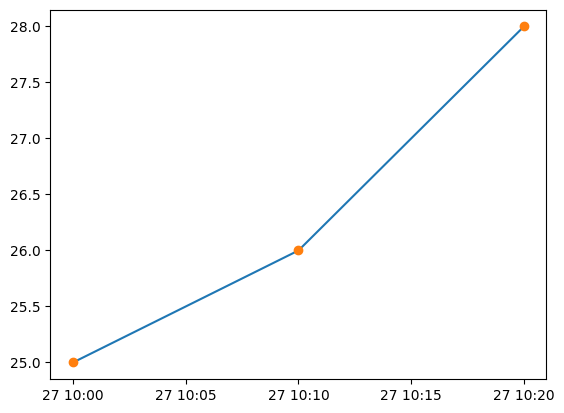

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def master_cleaning_step():
    print("--- [Step 2 Deep Dive] 데이터 청소 시뮬레이션 ---")

    # 1. 상황 설정: 더러운 센서 데이터 (Time Series)
    # - 10:00~10:20 데이터
    # - 결측치(NaN) 존재
    # - 중복 데이터(Duplicate) 존재
    data = {
        'time': ['10:00', '10:05', '10:10', '10:10', '10:15', '10:20'], # 10:10 중복
        'temp': [25.0, np.nan, 26.0, 26.0, np.nan, 28.0], # 중간중간 끊김
        'status': ['Ok', 'Ok', 'Ok', 'Ok', 'Fail', 'Ok']
    }
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time']) # 시간 타입 변환
    df = df.set_index('time') # 시계열 인덱스 설정

    print("\n1. [Raw Data] 더러운 상태 확인")
    print(df)

    # 2. 중복 제거 (Dedup)
    # - 상황: 네트워크 오류로 10:10 데이터가 두 번 들어옴
    print(f"\n>> 중복 발견: {df.duplicated().sum()}건")
    df = df.drop_duplicates(keep='first') # 첫 번째 것만 남김
    print("2. [Dedup] 중복 제거 완료")

    # 3. 결측치 진단 (Diagnosis)
    # - 시각화로 패턴을 봐야 하지만, 여기선 수치로 확인
    missing_cnt = df['temp'].isna().sum()
    print(f"\n>> 결측치 발견: {missing_cnt}건")

    # 4. 결측치 처방 (Prescription) -> 시계열이니까 'Linear Interpolation'
    # - 단순 평균(mean)을 쓰면 10:05분에 26.3도가 들어가서 그래프가 튐.
    # - 선형 보간을 쓰면 25.0과 26.0 사이인 '25.5'가 들어감 (논리적!)
    df['temp_filled'] = df['temp'].interpolate(method='linear')

    print("3. [Interpolate] 선형 보간 완료")
    print(df[['temp', 'temp_filled']])
    
    # 5. 시각화 (Before vs After)
    # 실제라면 여기서 plot을 그려서 채워진 모양이 자연스러운지 확인해야 함.
    plt.plot(df['temp_filled'], label='Cleaned')
    plt.plot(df['temp'], 'o', label='Raw')

if __name__ == "__main__":
    master_cleaning_step()

## 3. 인덱스 개념
- DataFrame은 열과 인덱스를 갖는다. 
- 인덱스란 행을 식별하는 라벨.

--> merge, sort, filtering 하다보면 행 순서가 계속 바뀌는데 이거를 막기 위해서 인덱스를 사용한다. 따라서 iloc보단 loc가 주로 활용됌.

- Python 리스트 / iloc: 0:3 → 0, 1, 2 (End Exclusive, 끝 제외) 
- Pandas loc: 'A':'C' → 'A', 'B', 'C' (End Inclusive, 끝 포함!)
- 이유: 이름(Label) 순서는 연속적이지 않을 수 있어서 "C 바로 앞까지"라는 개념이 모호하기 때문입니다. 그래서 C까지 포함합니다.

In [76]:
import pandas as pd

def coordinate_test():
    print("--- [테스트] loc vs iloc의 위험한 차이 ---")
    
    # 상황: 데이터가 정렬되면서 인덱스(이름표) 순서가 뒤섞임
    data = {'score': [100, 90, 80, 70]}
    df = pd.DataFrame(data, index=[0, 1, 2, 3]) # 처음엔 순서대로
    df = df.sort_values('score') # 점수 낮은 순 정렬 -> 인덱스도 [3, 2, 1, 0]으로 섞임
    
    print("1. 정렬 후 데이터프레임:")
    print(df)
    #    score
    # 3     70
    # 2     80
    # 1     90
    # 0    100
    
    # [함정 확인]
    print(f"\n2. df.iloc[0] (물리적 첫 번째 행): {df.iloc[0]['score']}") 
    # 예상: 70 (맨 위에 있는 녀석)
    
    print(f"3. df.loc[0] (이름이 0인 행): {df.loc[0]['score']}") 
    # 예상: 100 (맨 아래에 있는, 이름이 0인 녀석)

    # [슬라이싱 차이 확인]
    print("\n4. Slicing Test")
    print("iloc[0:2] (0, 1번 위치) -> 2개 나옴")
    print(df.iloc[0:2])
    
    print("\nloc[3:2] (이름 3부터 이름 2까지) -> 2개 나옴 (끝 포함!)")
    print(df.loc[3:2]) 

if __name__ == "__main__":
    coordinate_test()

--- [테스트] loc vs iloc의 위험한 차이 ---
1. 정렬 후 데이터프레임:
   score
3     70
2     80
1     90
0    100

2. df.iloc[0] (물리적 첫 번째 행): 70
3. df.loc[0] (이름이 0인 행): 100

4. Slicing Test
iloc[0:2] (0, 1번 위치) -> 2개 나옴
   score
3     70
2     80

loc[3:2] (이름 3부터 이름 2까지) -> 2개 나옴 (끝 포함!)
   score
3     70
2     80


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "user_id": [101, 102, 103],
    "name": ["A", "B", "C"],
    "score": [10, 20, 30]
})

# 기본 인덱스 
print(df.index)

# 특정 컬럼을 인덱스로 만들기
print(df.set_index('user_id')) # 원본을 바꾼게 아니라서 조회만 한거임.
df_index = df.set_index('user_id')

# 인덱스 라벨로 조회
print("\n")
print(df_index.loc[101,"name"])
print("\n")

# 지정 인덱스 원복 
df_back = df_index.reset_index()
print(df_back)


RangeIndex(start=0, stop=3, step=1)
        name  score
user_id            
101        A     10
102        B     20
103        C     30


A


   user_id name  score
0      101    A     10
1      102    B     20
2      103    C     30


## 4. 값 수정 및 삭제

- drop은 행/열 삭제
- replace는 대체 하는것
- mapping 과 replace 차이 : map은 키가 없는거는 무조건 NAN처리 replace는 없으면 유지. 
-
- [] = “여러 개 목록(list)”
- {} = “치환 규칙표(사전/dict: before→after)”
- () = “그냥 값 묶음(튜플) / 함수 호출 괄호”

In [65]:
import pandas as pd

df = pd.DataFrame({
    "name": ["A", "B", "C"],
    "city": ["Seoul", "seoul", "Busan"],
    "score": [10, 20, 30]
})

# 열삭제 
df_no_score = df.drop(columns=['score']) # 지우는게 여러개가 보통이라 그떄는 리스트로 받아서 이를 []로 처음부터 받음. /  원본 적용은 inplace = True하면 되긴함.
print(df)
print("\n 삭제후\n ")
print(df_no_score)

# 행 삭제 
df_drop_row = df.drop(index=[1,2]) 
print("\n 삭제후\n ")
print(df_drop_row)

# 대체하기
df_std = df.copy()
print("\n 변경후\n ")
df_std["city"] = df_std["city"].replace({"seoul":"SEOUL"})
print(df_std)


  name   city  score
0    A  Seoul     10
1    B  seoul     20
2    C  Busan     30

 삭제후
 
  name   city
0    A  Seoul
1    B  seoul
2    C  Busan

 삭제후
 
  name   city  score
0    A  Seoul     10

 변경후
 
  name   city  score
0    A  Seoul     10
1    B  SEOUL     20
2    C  Busan     30


## 5. 중복처리 
- SQL의 distinct같은 존재. 
- duplicated() : 중복표시 / drop_duplicates : 중복제거
- keep: "last", "first", "False" = (중복 모두 가짜)

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "user_id": [1, 1, 2, 3, 3],
    "event": ["click", "click", "view", "click", "purchase"],
    "ts": ["2026-01-01", "2026-01-01", "2026-01-01", "2026-01-02", "2026-01-03"]
})

print(df)

# 중복 확인
print(f"\n {df.duplicated()}") # keep="first"가 기본값이라 첫번쨰는 냅두고 이후 중복인거를 False
print(f"\n {df.duplicated(keep='last')}") # 마지막꺼 남기는거임.

# 특정키 기준 중복확인
print(f"\n{df.duplicated(subset=["user_id","event"])}") # (a,b)가 하나의 셋으로 되는거.
print(f"\n{df.duplicated(subset="ts")}") 


# 3) 중복 제거: 첫 번째만 남김
df_dedup = df.drop_duplicates(subset=["user_id", "event"], keep="first") # first, last는 사용자 맘 보통 last가 최신임.
print(df_dedup)


   user_id     event          ts
0        1     click  2026-01-01
1        1     click  2026-01-01
2        2      view  2026-01-01
3        3     click  2026-01-02
4        3  purchase  2026-01-03

 0    False
1     True
2    False
3    False
4    False
dtype: bool

 0     True
1    False
2    False
3    False
4    False
dtype: bool

0    False
1     True
2    False
3    False
4    False
dtype: bool

0    False
1     True
2     True
3    False
4    False
dtype: bool
   user_id     event          ts
0        1     click  2026-01-01
2        2      view  2026-01-01
3        3     click  2026-01-02
4        3  purchase  2026-01-03


## 6. 문자열 처리
- .str은 문자열 전용이라 공백/대소문자/포함여부/추출,분리 가능
- df[a].lower()같은거는 없음 그래서 .str.lower()이렇게 하는거임.
- a[0]은 첫번쨰 행을 의미하지만 .str[0]은 모든거 행의 첫번쨰를 의미하는거임. 

- .str.strip(): 앞뒤 공백깎기
- .str.lower()
- .str.contrains() : 특정 단어 있는지 확인
..
- 정확히 뭐를할지 찝고 적용해여함
ex) df['a'].str.lower() 이런식

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "email": ["a@test.com", "B@TEST.com", None],
    "city": [" seoul", "Busan ", "Incheon"]
})

# 1) 표준화: 공백 제거 + 케이스 통일
df2 = df.copy()
df2["city_std"] = df2["city"].str.strip().str.title() # .str을 붙이고 .메소드 적용

# 2) 이메일 소문자 통일(결측은 그대로)
df2["email_lower"] = df2["email"].str.lower()

# 3) 포함 여부(결측 정책: na=False로 False 처리)
df2["is_test"] = df2["email"].str.contains("test.com", na=False) # na=False는 nan을 False처리 하라는것.

print(df2)


        email     city city_std email_lower  is_test
0  a@test.com    seoul    Seoul  a@test.com     True
1  B@TEST.com   Busan     Busan  b@test.com    False
2        None  Incheon  Incheon        None    False


In [ ]:
import pandas as pd
import numpy as np

def transformation_pipeline():
    print("--- [Step 3] Vectorized Transformation ---")

    # 상황: 서버 로그 데이터 (더러운 문자열 + 불필요한 컬럼 + 코드 매핑 필요)
    data = {
        'log_id': [1, 2, 3, 4],
        'raw_msg': ['[INFO] User-A login', '[WARN] User-B timeout', '[ERROR] DB-Fail', '[INFO] User-A logout'],
        'status_code': ['200', '404', '500', '200'],
        'junk': ['x', 'x', 'x', 'x'] # 버려야 할 컬럼
    }
    df = pd.DataFrame(data)

    # 1. DROP: 불필요한 컬럼 제거 (메모리 확보)
    # axis=1 (열 방향) 주의
    df = df.drop('junk', axis=1) 
    print("1. Drop 완료 columns:", df.columns.tolist())

    # 2. STRING: .str Accessor로 파싱 (Vectorization)
    # '[INFO] User-A ...' -> 'INFO'만 추출
    # for loop 없이 한 방에 처리
    df['level'] = df['raw_msg'].str.split(']').str[0].str.replace('[', '')
    
    # Q. 그냥 리스트의 [0]으로 한다음.str.replace해도 되는거 아닌가? -> 지금 하나의 프레임으로 되어있음. 단순리스크가 아니라서 [0]일경우는 하나의 행이 나옴.
    # .str[0]은 모든 행의 0(첫번쨰)을 불러오도록 의미하는거임. [a,b]에서 b를 뽑고싶으면 그럼 a[0][1]하면됌
    
    print("\n2. .str 파싱 결과:")
    print(df[['raw_msg', 'level']])

    # 3. REPLACE: Hash Map을 이용한 고속 매핑
    # 200 -> OK, 나머지는 Check
    # (주의) replace는 부분 일치가 아니라 '완전 일치'일 때만 바뀜
    code_map = {'200': 'Success', '404': 'Client Error', '500': 'Server Error'}
    df['status_desc'] = df['status_code'].map(code_map)
    
    print("\n3. Map 매핑 결과:")
    print(df[['status_code', 'status_desc']])

    # 4. LOC: 조건부 수정 (Atomic Set)
    # 상황: 'Server Error'가 뜬 로그는 level을 'CRITICAL'로 격상시켜라.
    # [Bad] df[df['status_code'] == '500']['level'] = 'CRITICAL' (경고 발생!)
    
    # [Good] 원본 직접 수정
    df.loc[df['status_code'] == '500', 'level'] = 'CRITICAL'
    
    print("\n4. 조건부 수정 결과 (Server Error -> CRITICAL):")
    print(df.loc[2]) # 3번째 행 확인

if __name__ == "__main__":
    transformation_pipeline()

--- [Step 3] Vectorized Transformation ---
1. Drop 완료 columns: ['log_id', 'raw_msg', 'status_code']

2. .str 파싱 결과:
                 raw_msg  level
0    [INFO] User-A login   INFO
1  [WARN] User-B timeout   WARN
2        [ERROR] DB-Fail  ERROR
3   [INFO] User-A logout   INFO

3. Map 매핑 결과:
  status_code   status_desc
0         200       Success
1         404  Client Error
2         500  Server Error
3         200       Success

4. 조건부 수정 결과 (Server Error -> CRITICAL):
log_id                       3
raw_msg        [ERROR] DB-Fail
status_code                500
level                 CRITICAL
status_desc       Server Error
Name: 2, dtype: object
